### Exercise 2: SVC Model.
#### Use the Iris dataset.
#### Question 6. Use ‘species’ as the target variable.
#### Question 7. Remember to encode the data set, as it is not possible to establish a relationship among the string values.
#### Question 8. Create training and testing sets (80% training).
#### Question 9. Before making any actual predictions, make sure to scale the features so that all of them can be uniformly evaluated.
#### Question 10. Use Support Vector Classifier to train and predict.
#### Question 11. Provide the confusion matrix, the classification report, and the accuracy score.

In [1]:
#Loading libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, scale
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
print (iris.describe())
iris["species"].value_counts()

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

In [4]:
iris.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

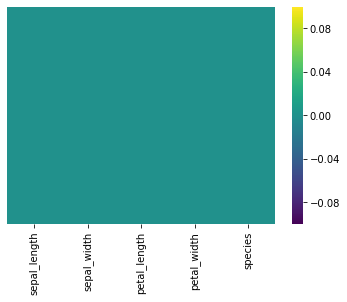

In [5]:
# Use heatmap to determine if there are missing data
sns.heatmap(iris.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [6]:
features=iris.iloc[:,0:4]
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
#species = np.asarray(iris.species)
species=iris.species

#### Answer to Q6 and Q7: Species is encoded and set as the target

In [8]:
lb_make = LabelEncoder()
iris["species_code"] = lb_make.fit_transform(iris["species"])
iris[["species", "species_code"]].head(5)

,species,species_code
0,Iris-setosa,0
1,Iris-setosa,0
2,Iris-setosa,0
3,Iris-setosa,0
4,Iris-setosa,0


In [9]:
#Assigning target
target= iris.species_code

#### Answer to Q8: Created a 80% training set

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2) 
#copying X_train in to dataframe to use it in plot
df_X_train=pd.DataFrame(X_train)

#### Answer to Q9: Features have been scaled

In [35]:
# Load the standard scaler
sc = StandardScaler()

# Compute the mean and standard deviation based on the training data
sc.fit(X_train)

# Scale the training data to be of mean 0 and of unit variance
X_train_std = sc.transform(X_train)

# Scale the test data to be of mean 0 and of unit variance
X_test_std = sc.transform(X_test)
#https://chrisalbon.com/machine_learning/preprocessing_structured_data/preprocessing_iris_data/

In [36]:
#converting X_train_scaled in to dataframe to use it in plot
df_X_train_std=pd.DataFrame(X_train_std,columns=features.columns)
df_X_train_std.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.461296,1.962491,-1.070748,-0.967578
1,-0.697354,0.804679,-1.239002,-1.230269
2,-0.815383,1.499366,-1.182917,-0.967578
3,-1.051441,0.109992,-1.182917,-1.361614
4,-0.461296,0.804679,-1.182917,-0.967578


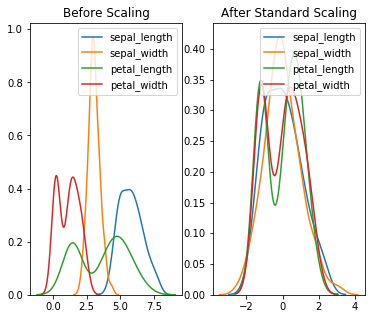

In [37]:
#Plotting the difference between scaled training data and without scaled data

%matplotlib inline

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title("Before Scaling")
sns.kdeplot(df_X_train['sepal_length'],ax=ax1)
sns.kdeplot(df_X_train['sepal_width'],ax=ax1)
sns.kdeplot(df_X_train['petal_length'],ax=ax1)
sns.kdeplot(df_X_train['petal_width'],ax=ax1)
ax2.set_title("After Standard Scaling")
sns.kdeplot(df_X_train_std['sepal_length'],ax=ax2)
sns.kdeplot(df_X_train_std['sepal_width'],ax=ax2)
sns.kdeplot(df_X_train_std['petal_length'],ax=ax2)
sns.kdeplot(df_X_train_std['petal_width'],ax=ax2)

All the features approximately are on same scale relative to one another.

#### Answer to Q10: Used SVC to train and predict

In [38]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
clf = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
# fitting the model for grid search 
clf.fit(X_train_std, Y_train) 

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.805, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.875, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.897, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.805, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.850, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.872, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.0s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [39]:
# print best parameter after tuning 
param=clf.best_params_

In [40]:
model = SVC(kernel='rbf', gamma=param['gamma'], C=param['C'])

In [41]:
model.fit(X_train_std,Y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Answer to Q11: Below is the confusion matrix, the classification report, and the accuracy score.

In [42]:
#Check how SVC works

predicted = model.predict(X_test_std)
expected = Y_test


In [43]:
#Classification report
print(classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.91      0.95        11
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [74]:
cm=np.array(confusion_matrix(expected, predicted, labels=[2,1,0]))
Confusion_transposed=pd.DataFrame(cm, index=[ 'predicted_Virginica','predicted_Versicolour','predicted_Setosa'],
                         columns=['Virginica','Versicolour','Setosa'])
#print(cm)
cm_2=cm[::-1,::-1]
print(cm_2)
confusion = pd.DataFrame(cm_2, index=[ 'Virginica','Versicolour','Setosa'],
                         columns=['predicted_Virginica','predicted_Versicolour','predicted_Setosa'])
print (confusion)


[[ 6  0  0]
 [ 0 10  1]
 [ 0  0 13]]
             predicted_Virginica  predicted_Versicolour  predicted_Setosa
Virginica                      6                      0                 0
Versicolour                    0                     10                 1
Setosa                         0                      0                13


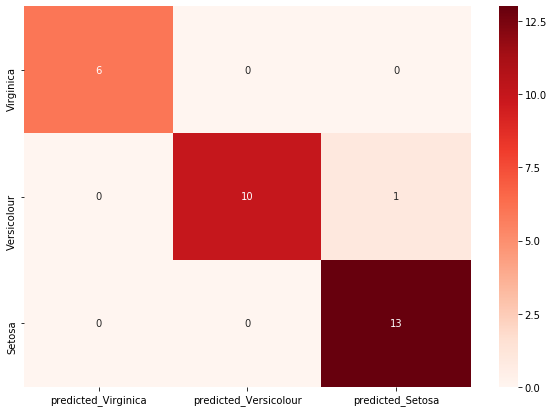

In [70]:
plt.figure(figsize = (10,7))
ax=sns.heatmap(confusion, annot=True, fmt='g',cmap="Reds")

In [51]:
#Check accuracy
print("Accuracy of our model: %.2f" % accuracy_score(expected,predicted))


Accuracy of our model: 0.97


In [84]:
#Recall
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)

mean_recall=np.mean(recall)

print("Mean Recall:",round(mean_recall,2))

#Precision
precision = np.diag(cm) / np.sum(cm, axis = 0)

mean_precision=np.mean(precision)
print("Mean Precision:",round(mean_precision,2))

Mean Recall: 0.97
Mean Precision: 0.98
